# Short primer on pytorch



In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from math import pi, log
from torch.utils import data
import numpy as np
import matplotlib as mpl

import jupyter_black

jupyter_black.load()

In [4]:
_ = torch.manual_seed(0)

# A very brief intro to PyTorch

Say we are given some data $x$ that is generated by some process $f(\theta) + noise$. \
It looks as follows:

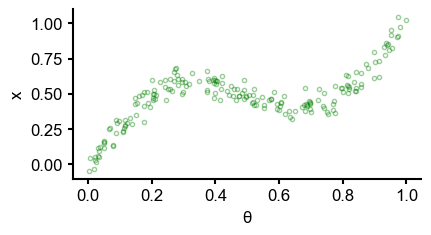

In [5]:
n = 200  # number of datapoints
d = 1  # dimensionality of parameter space theta

theta = torch.rand((n, d))  # uniform


def func(theta):
    return theta + 0.3 * torch.sin(2 * pi * theta)


noise = torch.randn((n, d)) * 0.05
x = func(theta) + noise

# Data t_train and x_train
with mpl.rc_context(fname=".matplotlibrc"):

    fig = plt.figure(figsize=(4.5, 2.2))
    plt.plot(theta[:400], x[:400], "go", alpha=0.4, markerfacecolor="none")
    plt.xlabel(r"$\theta$")
    plt.ylabel("x")
    plt.savefig("figures/data_samples.png", dpi=200, bbox_inches="tight")
    plt.show()

<img src="figures/data_samples.png" alt="drawing" width="900"/>  

We want to train a neural network to predict $x$ from $\theta$.

First, let's define our dataset:

In [64]:
dataset = data.TensorDataset(theta, x)
train_loader = data.DataLoader(dataset, batch_size=20)

Then, we build a neural network. The weights of this network will be optimized:

In [65]:
net = nn.Sequential(
    nn.Linear(1, 20), nn.ReLU(), nn.Linear(20, 20), nn.ReLU(), nn.Linear(20, 1)
)

But what is our "loss" function? \
As we want to learn the function $f$ the model should learn the mean value of $f(θ)$ for all $θ$. 

So we define the loss to be the mean-squared error (MSE):



In [52]:
def get_loss(prediction, data):
    return torch.mean((prediction - data) ** 2)

We define an optimizer which optimizes the weights (e.g. with gradient descent):

In [66]:
opt = optim.Adam(net.parameters(), lr=0.01)

Finally, we build a training loop where we optimize the weights with a Mean-Squared error loss:

In [67]:
training_loss = []
n_epochs = 200
for e in range(n_epochs):
    for theta_batch, x_batch in train_loader:
        opt.zero_grad()
        nn_output = net(theta_batch)
        loss = get_loss(nn_output, x_batch)
        training_loss.append(loss.item())
        loss.backward()
        opt.step()

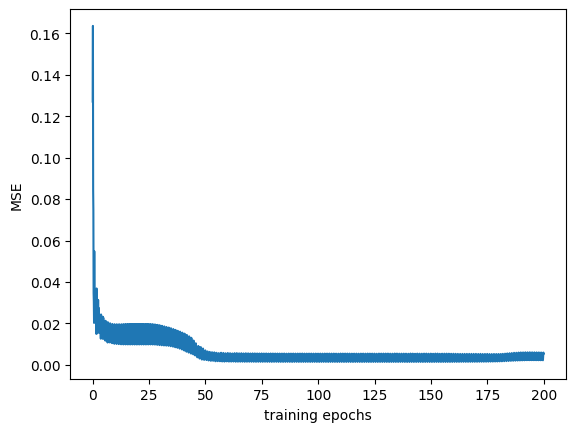

In [68]:
plt.plot(np.arange(len(training_loss)) / len(train_loader), training_loss)
plt.xlabel("training epochs")
plt.ylabel("MSE")
plt.show()

Let's see if the neural network learned something...

In [71]:
predictions = []
for t in torch.linspace(0, 1, 100):
    predictions.append(net(torch.as_tensor([t])))
predictions = torch.stack(predictions)

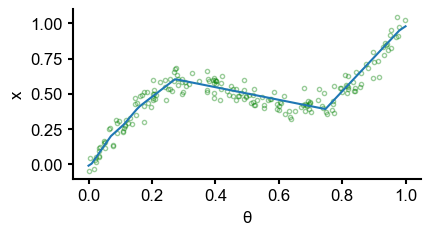

In [72]:
with mpl.rc_context(fname=".matplotlibrc"):
    fig = plt.figure(figsize=(4.5, 2.2))
    plt.plot(theta[:400], x[:400], "go", alpha=0.4, markerfacecolor="none")
    plt.xlabel(r"$\theta$")
    plt.ylabel("x")
    plt.plot(np.linspace(0, 1, 100), predictions.detach().numpy())
    plt.savefig("figures/nn_prediction.png", dpi=200, bbox_inches="tight")
    plt.show()

<img src="figures/nn_prediction.png" alt="drawing" width="900"/>  

## Main ingredients for Deep Learning
You saw the main ingredients of most deep-learning pipelines:
1. A dataset
2. The actual network
3. A loss function
4. An optimizer
5. The actual training loop